<div dir=rtl>
    <h2>
        سوال دوم پروژه - سینا باقری نژاد
    </h2>
    </div>

<div dir=rtl>
    ابتدا کتابخوانه های مورد نظر را فراخوانی می کنیم.
    </div>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<div dir=rtl>
    به منظور نمایش خروجیها در آینده، تابعی را تعریف می کنیم
    </div>

In [2]:
def showImage(img):
    plt.figure(figsize=(10, 7))
    plt.imshow(img)
    plt.show()

<div dir=rtl>
    ابتدا تصویر مربوطه را خوانده و نقاط چهار گوشه تصویر و همچنین چهار گوشه تلویزیون را مشخص می کنیم. چهارگوشه تصویر اصلی با نقاط زرد و چهارگوشه تلویزیون با نقاط قرمز مشخص شده اند. ما در این تمرین قصد داریم خود همین تصویر را در تلویزیون داخل تصویر نمایش دهیم.
    </div>

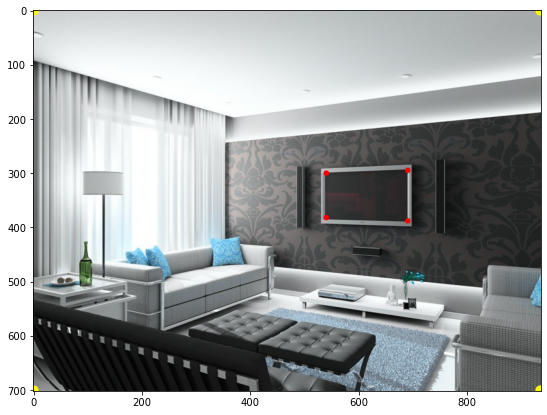

In [3]:
image = cv2.imread('images/room.jpg')
tv_points = np.array([[300, 540],
                      [295, 690],
                      [388, 690],
                      [382, 540]
                     ])
image_points = np.array([[0, 0],
                         [0, image.shape[1]-1],
                         [image.shape[0]-1, image.shape[1]-1],
                         [image.shape[0]-1, 0],
                        ])

frame = image.copy()
for p in tv_points:
    frame = cv2.circle(frame,(p[1], p[0]),5,250,-1)
for p in image_points:
    frame = cv2.circle(frame,(p[1], p[0]),10,[250,250,0],-1)
showImage(frame)

<div dir=rtl>
    حال با داشتن این چهار نقطه متناظر کافی است ماتریس هموگرافی را تعیین کنیم. تابع همان تابع تمرین اول است و با استفاده از آن ماتریس هموگرافی تعیین میشود. این ماتریس تبدیلی است که هر نقطه از تصویر را به محل متناظر آن بر روی صفحه تلویزیون منطبق می کند.
    </div>

In [4]:
def homography(p1, p2):
    A = np.zeros((len(p1) * 2, 9))
    for i in range(len(p1)):
        x1, y1 = p1[i, 0], p1[i, 1]
        x2, y2 = p2[i, 0], p2[i, 1]
        A[2*i] = [-x1, -y1, -1, 0, 0, 0, x2*x1, x2*y1, x2]
        A[2*i+1] = [0, 0, 0, -x1, -y1, -1, y2*x1, y2*y1, y2]
        
    u, s, vh = np.linalg.svd(A)
    h = vh[8].reshape(3, 3)
    return h

h = homography(image_points, tv_points)

<div dir=rtl>
    حال به منظور اینکه تصویر اتاق به محل صفحه تلویزیون برود، باید تمامی پیکسلها با استفاده از ماتریس هموگرافی منتقل شوند. بدین منظور تابع زیر نوشته شده است. نتیجه را در ادامه مشاهده می کنید.
    </div>

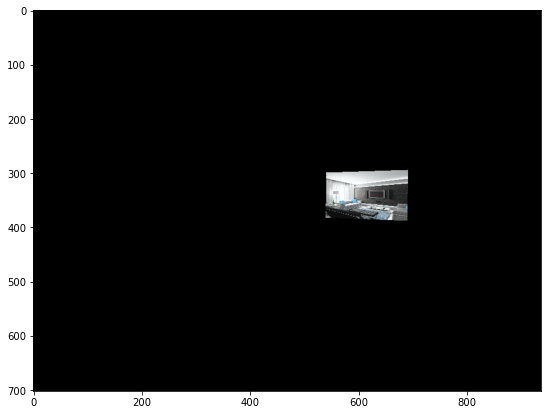

In [5]:
def to_homogeneous(point):
    return np.append(point, 1)

def to_cartesian(point):
    return np.delete(point / point[-1], -1)

def warp_perspective(image, h, shape):
    new_image = np.uint8(np.zeros(shape))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            x = [i, j]
            x_prime = np.int0(to_cartesian(h @ to_homogeneous(x)))
            new_image[x_prime[0], x_prime[1]] = image[i, j]
    return new_image

new_image = warp_perspective(image, h, shape=image.shape)

showImage(new_image)

<div dir=rtl>
    در نهایت کافی است تصویر اولیه را با تصویر انتقال یافته ادغام کنیم. نتیجه به خوبی حاصل شده است.
    </div>

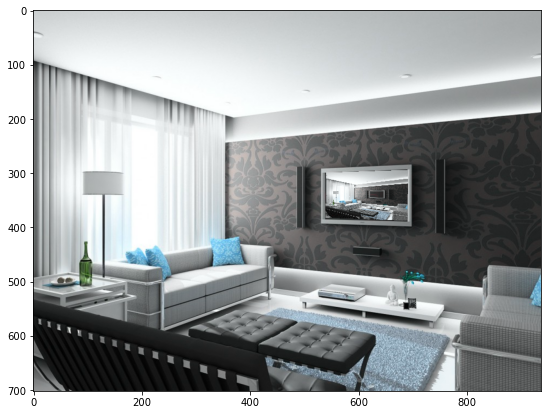

In [6]:
image[new_image.nonzero()] = 0

showImage(image + new_image)